In [157]:
from mnist.loader import MNIST
from skimage.io import imread
from skimage.io import imshow
import numpy as np
from operator import itemgetter
%matplotlib inline

In [158]:
loader = MNIST('./dataset')
loader.load_training()
train_images = loader.train_images
train_labels = loader.train_labels
print(len(labels), train_labels[0])

NameError: name 'labels' is not defined

In [161]:
images = np.array(train_images)
# images = images.reshape((len(images), 28, 28))
print(images.shape)

(60000, 784)


In [162]:
def dist_matrix(ii1, ii2):
    m1 = np.power(images[ii1], 1)
    m2 = np.power(images[ii2], 1)
    r = np.abs(m1 - m2)
    return r
#     return np.hypot(images[i1], images[i2])

/Users/ananas/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


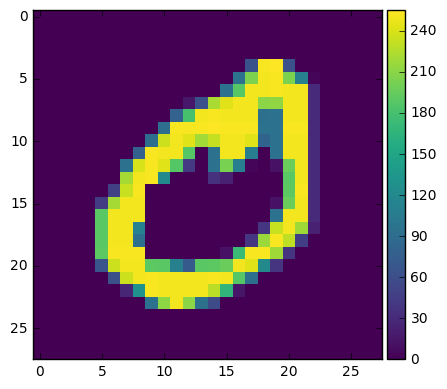

In [190]:
ind1 = 21
ind2= 35
imshow(np.array(images[ind1]).reshape((28,28)))

In [170]:
imshow(np.array(images[ind2]).reshape((28,28)))
print(images[ind2])

/Users/ananas/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  29 141 198 255 198   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  86 141 198
 255 255 255 255 170   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  29 141 226 255 255 255 255 198  8

/Users/ananas/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


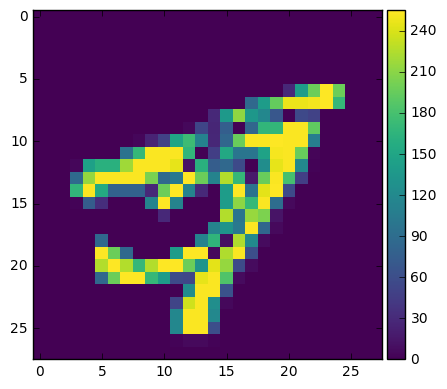

In [165]:
diff = dist_matrix(ind1, ind2).reshape((28,28))
# print(diff)
imshow(diff)
# print('sum: ', diff.sum())

In [166]:
np.power(np.array([1, 2, 3, 4]), 2)

array([ 1,  4,  9, 16])

In [167]:
def classificator(index, k):
    i_class = np.zeros(10)
    ind = 0
    N = 1000
    kNN = int(N * k)
    k_mass = []
    for j in range(1, N):
        dist = np.sqrt(np.power(images[index] - images[j], 2).sum())
        
        k_mass.append([dist, train_labels[j]])
        
        
    k_mass = sorted(k_mass, key=itemgetter(0))
    
        
    for k in range(kNN):
        i_class[k_mass[k][1]] += 1/np.power(k_mass[k][0], 2)
            
    return i_class.argmax()

In [168]:
right = 0
wrong = 0
w_answ = []
for k in [0.001 * i for i in range(1,11)]:
    for i in range(10001, 10101):
        if classificator(i, k) == train_labels[i]:
            right += 1
        else:
            wrong += 1
    #     w_answ.append(classificator(i))

    # print(right,'\n', wrong)
    print("%.4f %.4f" % (k, right / (right + wrong)))
# print(w_answ)
# print(train_labels[101:200])

0.0010 0.9100
0.0020 0.9100
0.0030 0.9033
0.0040 0.8975
0.0050 0.8960
0.0060 0.8967
0.0070 0.8929
0.0080 0.8875
0.0090 0.8844
0.0100 0.8820


In [125]:
test = 101
print(train_labels[test])
print(classificator(test))
# imshow(np.array(train_images[test]).reshape((28, 28)))

7
[ 0.  4.  0.  0.  2.  0.  0.  9.  0.  5.]
7


In [246]:
def classificator2(index):
    i_class = np.full(np.array(train_images[index]), (10))